![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Face Mask Prediction using U-Net
Task is to predict the mask around the face in a given image.

# Instructions
- Some part of the code is already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

## Dataset
Faces in images marked with bounding boxes. Have around 409 images with around 1000 faces manually tagged via bounding box.
- Data file name: images.npy

### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [173]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Load the "images.npy" file (2 marks)
- This file contains images with details of bounding boxes

In [174]:
import numpy as np
data =np.load('/content/drive/MyDrive/AIML/week_5_project/images.npy',allow_pickle=True)

### Check one sample from the loaded "images.npy" file  (3 marks)
- Hint: print data[10][1] 

In [175]:
print(data.shape)
print(data[20][1])


(409, 2)
[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.4979166666666667, 'y': 0.20833333333333334}, {'x': 0.7854166666666667, 'y': 0.6888888888888889}], 'imageWidth': 480, 'imageHeight': 360}]


### Set image dimensions   (2 marks)
- Initialize image height, image width with value: 224 

In [176]:
IMAGE_HEIGHT=224
IMAGE_WIDTH=224

### Create features and labels
- Here feature is the image
- The label is the mask
- Images will be stored in "X" array
- Masks will be stored in "masks" array

In [177]:
import cv2
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

In [178]:
print(X.shape)
print(masks.shape)

(409, 224, 224, 3)
(409, 224, 224)


### Split the data into training and testing (3 marks)
- 400 images in training
- 9 images in testing data

### Print a sample training image, image array and its mask (3 marks)

Print the image and image array

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[[[-0.69411767 -0.48235291 -0.33333331]
  [-0.69411767 -0.48235291 -0.34901959]
  [-0.68627453 -0.46666664 -0.36470586]
  ...
  [-0.67843139 -0.63137257 -0.63137257]
  [-0.74117649 -0.6156863  -0.63921571]
  [-0.72549021 -0.60784316 -0.63137257]]

 [[-0.69411767 -0.48235291 -0.33333331]
  [-0.69411767 -0.48235291 -0.34901959]
  [-0.68627453 -0.46666664 -0.372549  ]
  ...
  [-0.67058825 -0.6156863  -0.6156863 ]
  [-0.71764708 -0.60784316 -0.64705884]
  [-0.70980394 -0.60000002 -0.63921571]]

 [[-0.7019608  -0.49019605 -0.34117645]
  [-0.69411767 -0.48235291 -0.34901959]
  [-0.69411767 -0.47450978 -0.372549  ]
  ...
  [-0.67843139 -0.59215689 -0.62352943]
  [-0.68627453 -0.59215689 -0.62352943]
  [-0.68627453 -0.59215689 -0.62352943]]

 ...

 [[-0.72549021 -0.57647061 -0.54509807]
  [-0.71764708 -0.56862748 -0.53725493]
  [-0.70980394 -0.56078434 -0.53725493]
  ...
  [ 0.16078436  0.22352946  0.56862748]
  [ 0.25490201  0.37254906  0.7019608 ]
  [ 0.3176471   0.42745101  0.75686276]]

 [

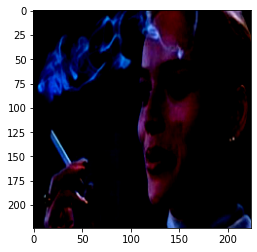

In [179]:
import cv2
import matplotlib.pyplot as plt
print(X[120])
plt.imshow((X[120]))

Print the mask

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 1. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


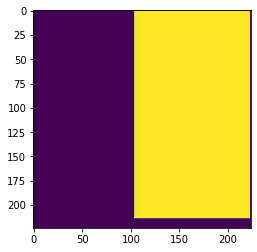

In [180]:
print(masks[120])
plt.imshow((masks[120]))

## Create the model (7 marks)
- Add MobileNet as model with below parameter values
  - input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
  - include_top: False
  - alpha: 1.0
  - weights: "imagenet"
- Add UNET architecture layers
  - This is the trickiest part of the project, you need to research and implement it correctly

In [181]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Concatenate, UpSampling2D, Conv2D, Reshape
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.models import Model

def create_model(trainable = True):
    IMG_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, 3)
    model = MobileNet(input_shape = IMG_SHAPE, alpha = 1.0, include_top = False, weights = 'imagenet')
    for layer in model.layers:
        layer.trainable = trainable

    block0 = model.get_layer('conv_pw_1_relu').output
    block1 = model.get_layer('conv_pw_3_relu').output
    block2 = model.get_layer('conv_pw_5_relu').output
    block3 = model.get_layer('conv_pw_11_relu').output
    block4 = model.get_layer('conv_pw_13_relu').output

    x = Concatenate()([UpSampling2D()(block4), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block0])
    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size = 1, activation = "sigmoid")(x)

    x = Reshape((IMAGE_HEIGHT, IMAGE_HEIGHT))(x)

    return Model(inputs = model.input, outputs = x)
  
   

### Call the create_model function (2 marks)
- Give trainable=False as argument, if you want to freeze lower layers for fast training (but low accuracy)

In [182]:
model = create_model(False)

### Print model summary (2 marks)

In [183]:
model.summary()

Model: "functional_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_10[0][0]                   
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
______________________________________________________________________________________

### Define dice coefficient function (3 marks)
- Create a function to calculate dice coefficient


In [184]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

### Define loss function (3 marks)

In [185]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

### Compile the model (3 marks)
- Complie the model using below parameters
  - loss: use the loss function defined above
  - optimizers: use Adam optimizer
  - metrics: use dice_coefficient function defined above

In [186]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Define callbacks (3 marks)
- Use ModelCheckpoint
- Use EarlyStopping
- Use ReduceLROnPlateau

In [187]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min", save_freq=1)
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

Split the data into training and testing

 400 images in training data
 
 9 images in testing data



In [188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, masks, test_size = 0.022, shuffle = False)

In [189]:
print('Number of images in training data = ', X_train.shape[0])
print('Number of images in testing data = ', X_test.shape[0])
print('Number of labels in training data = ', y_train.shape[0])
print('Number of labels in testing data = ', y_test.shape[0])

Number of images in training data =  400
Number of images in testing data =  9
Number of labels in training data =  400
Number of labels in testing data =  9


### Fit the model (3 marks)
- Fit the model using below parameters
  - epochs: you can decide
  - batch_size: 1
  - callbacks: use the callbacks defined above

In [190]:
model.fit(X_train, y_train, epochs = 10, batch_size = 1, callbacks = [checkpoint, reduce_lr, stop], validation_data = (X_test, y_test),
                    workers = 8,
                    use_multiprocessing = True,                    
                    verbose = 1)

Streaming output truncated to the last 5000 lines.
Epoch 00004: loss did not improve from 0.64663
307/400 [======================>.......] - ETA: 2s - loss: 1.0398 - dice_coefficient: 0.5027
Epoch 00004: loss did not improve from 0.64663

Epoch 00004: loss did not improve from 0.64663
309/400 [======================>.......] - ETA: 2s - loss: 1.0371 - dice_coefficient: 0.5035
Epoch 00004: loss did not improve from 0.64663

Epoch 00004: loss did not improve from 0.64663
311/400 [======================>.......] - ETA: 2s - loss: 1.0377 - dice_coefficient: 0.5028
Epoch 00004: loss did not improve from 0.64663

Epoch 00004: loss did not improve from 0.64663
313/400 [======================>.......] - ETA: 2s - loss: 1.0389 - dice_coefficient: 0.5018
Epoch 00004: loss did not improve from 0.64663

Epoch 00004: loss did not improve from 0.64663
315/400 [======================>.......] - ETA: 2s - loss: 1.0396 - dice_coefficient: 0.5010
Epoch 00004: loss did not improve from 0.64663

Epoch 000

### Get the predicted mask for a test image   (3 marks)

Show the test image

(224, 224, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


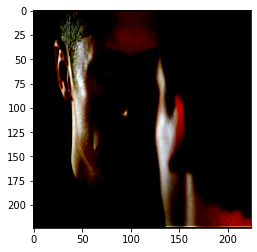

In [191]:
n = 4
sample_image = X_test[n]
final_image = sample_image
print(sample_image.shape)
plt.imshow(sample_image)

Show original mask for test image

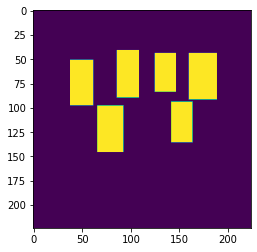

In [192]:
sample_mask = masks[n]
final_mask = sample_mask
plt.imshow(sample_mask)

Predict the mask on the test image

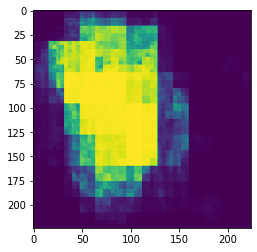

In [193]:
sample_image = np.resize(sample_image, (1, 224, 224, 3))
pred_mask = model.predict(x = sample_image)
pred_mask = np.resize(pred_mask, (224, 224))
plt.imshow(pred_mask)

### Impose the mask on the test image (3 marks)
- In imshow use the alpha parameter and set it to greater than 0.5

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


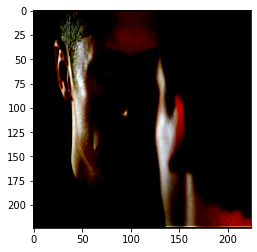

In [194]:
final_pred_mask = np.resize(pred_mask, (224, 224))
final_image = np.resize(sample_image, (224, 224, 3))
plt.imshow(final_image)

Mask imposed on image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


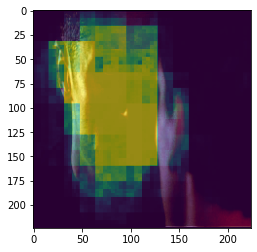

In [195]:
fig = plt.figure()
img_1 = plt.imshow(final_image)
img_2 = plt.imshow(final_pred_mask, alpha = 0.6)
plt.show()